# Scaled vs Non-scaled scatter plot visualisations

All columns included in scaling and PCA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#Create dataframe
df = pd.read_csv('abalone.data')
df.columns = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']

#Convert 'sex' column to booleans.
df = pd.get_dummies(df, columns = ['sex'])

y = df['rings']

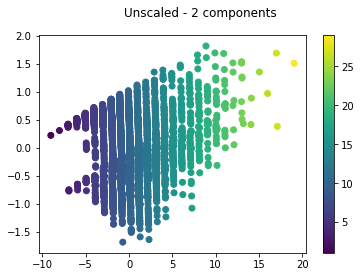

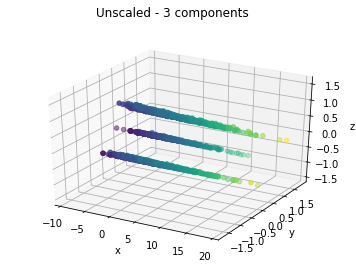

In [11]:
#Unscaled 2D PCA

pca2D = PCA(n_components=2, svd_solver='full')

unscaled2D = pca2D.fit(df).transform(df)
unscaled2D = pd.DataFrame(unscaled2D)
plt.scatter(unscaled2D[0], unscaled2D[1],c=y)
plt.suptitle('Unscaled - 2 components')
plt.colorbar()
plt.show()

#Unscaled 3D PCA

from mpl_toolkits.mplot3d import Axes3D

pca3D = PCA(n_components=3, svd_solver='full')

unscaled3D = pca3D.fit(df).transform(df)
unscaled3D = pd.DataFrame(unscaled3D)
unscaled3D.columns = ['x','y','z']

fig = plt.figure()
plt.suptitle('Unscaled - 3 components')
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(unscaled3D['x'], unscaled3D['y'], unscaled3D['z'], c=y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

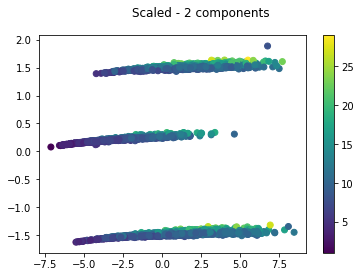

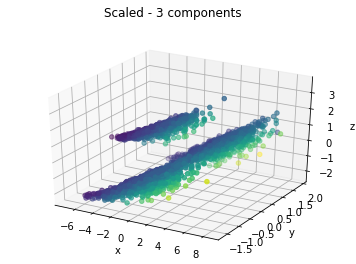

In [14]:
#Scaled

scaled = StandardScaler().fit_transform(df)

#Scaled 2D

scaled2D = pca2D.fit(scaled).transform(scaled)
scaled2D = pd.DataFrame(scaled2D)

plt.scatter(scaled2D[0],scaled2D[1], c=y)
plt.suptitle('Scaled - 2 components')
plt.colorbar()
plt.show()

#Scaled 3D

scaled3D = pca3D.fit(scaled).transform(scaled)
scaled3D = pd.DataFrame(scaled3D)
scaled3D.columns = ['x','y','z']

fig = plt.figure()
plt.suptitle('Scaled - 3 components')
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(scaled3D['x'], scaled3D['y'], scaled3D['z'], c=y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

These groupings we're getting must be determined by the 'sex' feature, since that has only three possible values, and I don't see these sorts of shapes in the first notebook, where I removed the 'sex' column.

I'd like to see how many features we can remove and still have a functional model, thinking from the perspective of a field biologist.